In [1]:
from jax import numpy as np
import matplotlib.pyplot as plt

Cumulative Distribution Function for Frechet Distribution:<br><center>
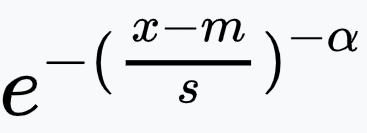
</center>

PDF for Frechet Distribution:<br>
<center>

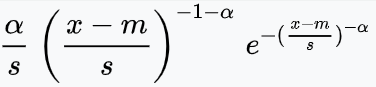

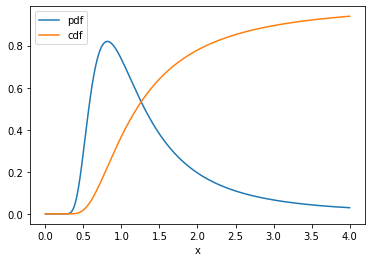

In [2]:
#Function to return value of cdf for given x,a(alpha),b(beta),c(gamma)
def frechet_cdf(x,a,s,m):
  y = np.exp(-((x-m)/s)**(-a))
  return y


#Function to return value of pdf for given x, a(alpha), m, s
def frechet_pdf(x,a,s,m):
  y = (a/s) * (((x-m)/s)**(-1-a)) * np.exp(- ((x-m)/s)**(-a) )
  return y

x = np.linspace(0, 4, 1000)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,frechet_pdf(x,2.,1., 0),label='pdf')
ax.plot(x,frechet_cdf(x,2.,1., 0),label='cdf')
ax.legend()
ax.set_xlabel("x")

plt.legend()

# Inverse CDF Sampling

Inverse CDF for Frechet Distribution:
<center>

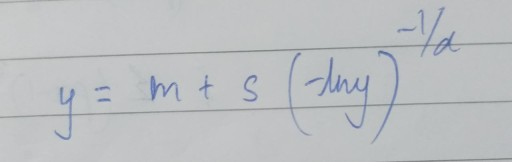

(array([975.,  18.,   4.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  0.       ,   6.3202496,  12.640499 ,  18.960749 ,  25.280998 ,
         31.601248 ,  37.921497 ,  44.24175  ,  50.561996 ,  56.882248 ,
         63.202496 ,  69.52274  ,  75.842995 ,  82.163246 ,  88.4835   ,
         94.80374  , 101.12399  , 107.444244 , 113.764496 , 120.08474  ,
        126.40499  , 132.72523  , 139.04549  , 145.36574  , 151.68599  ,
        158.00624  , 164.32649  , 170.64674  , 176.967    , 183.28725  ,
        189.60748  , 195.92773  , 202.24799  , 208.56824  , 214.88849  ,
        221.20874  , 227.52899  , 233.84924  , 240.16948  , 246.48973  ,
        252.80998  , 259.13025  , 265.45047  , 271.77072  , 278.09097  ,
 

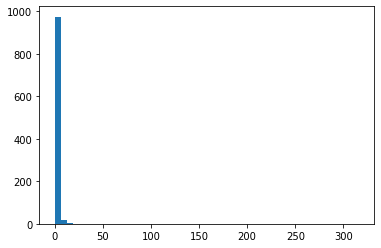

In [3]:
def inverse_cdf_frechet(x,a,s,m):
  y = m + s*((-np.log(x))**(-1/a))
  return y
u = np.linspace(0.,0.99999,1000)
y = inverse_cdf_frechet(u, 2., 1., 0)
plt.hist(y, bins=50, label = 'inverse_cdf')

Text(0.5, 1.0, 'Kernel Densiy Estimate vs Actual Distribution')

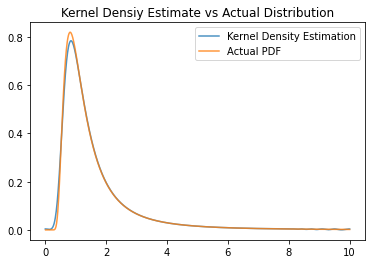

In [4]:
# y = y[:, np.newaxis]
x_test = np.linspace(0, 10, 1000)

from sklearn.neighbors import KernelDensity
# model = KernelDensity(kernel='gaussian', bandwidth = 0.)
# model.fit(y)
# log_dens = model.score_samples(x_test)
# plt.fill(x_test, np.exp(log_dens), c='cyan')
# plt.show()

kde = KernelDensity(bandwidth=0.1, kernel='gaussian')
kde.fit(y[:, None])

# score samples returns the log of the probability density
logprob = kde.score_samples(x_test[:, None])

plt.plot(x_test, np.exp(logprob), alpha=0.8, label = 'Kernel Density Estimation')
plt.plot(x_test, frechet_pdf(x_test, 2., 1., 0), alpha=0.8, label = 'Actual PDF')
plt.legend()
plt.title("Kernel Densiy Estimate vs Actual Distribution")

As we can see, the Kernel Density Estimation plot matches the actual Probability Distribution.

# Reproducing the graph from Wikipedia

[Link to Graph](https://en.wikipedia.org/wiki/File:Frechet_pdf.svg)


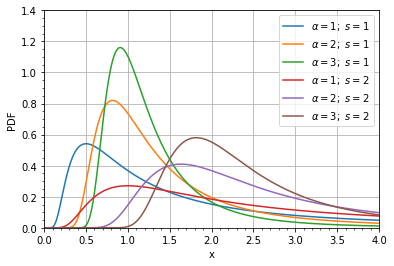

In [5]:
fig = plt.figure()
graph = fig.add_subplot(111)
graph.plot(x,frechet_pdf(x,1.,1.,0),label=r'$\alpha=1;$ $s=1$')
graph.plot(x,frechet_pdf(x,2.,1.,0),label=r'$\alpha=2;$ $s=1$')
graph.plot(x,frechet_pdf(x,3.,1.,0),label=r'$\alpha=3;$ $s=1$')
graph.plot(x,frechet_pdf(x,1.,2.,0),label=r'$\alpha=1;$ $s=2$')
graph.plot(x,frechet_pdf(x,2.,2.,0),label=r'$\alpha=2;$ $s=2$')
graph.plot(x,frechet_pdf(x,3.,2.,0),label=r'$\alpha=3;$ $s=2$')
graph.legend()
graph.set_xlabel("x")
graph.set_ylabel("PDF")
graph.set_xlim(0,4)
graph.set_ylim(0,1.4)
graph.grid()
graph.minorticks_on()

Resources Used:<br>
<a href = 'https://real-statistics.com/other-key-distributions/frechet-distribution/'> Frechet Distribution I </a> <br>

<a href = 'https://en.wikipedia.org/wiki/Fr%C3%A9chet_distribution'> Frechet Distribution II </a>

<a href='https://stackabuse.com/kernel-density-estimation-in-python-using-scikit-learn/'> Kernel Density Estimation </a>